# Homework #1 - Basic Statistics

**In this assignment, you are going to solve some basic statistical problems like estimating parameters of a distribution. In each problem, you are instructed to write little chunks of Python code. Additionally, there are few questions that you have to answer based on your observations and your knowledge of statistics.**

**Ultimately, you are expected to submit your solutions as a single jupyter notebook, *not a python script or anything else.***

**In the case of any questions, post it on the Q&A forum.**

Good Luck

In [1]:
!pip install dists

  Created wheel for dists: filename=dists-0.2-py3-none-any.whl size=4705 sha256=0b755eec7c34fcb1a4165465f03c99476626642170c38a6bd41486d755a7e1f3
  Stored in directory: /root/.cache/pip/wheels/01/2e/12/3c173eabb69e10189f3fe3d6fbe2a863557ae0f03fd2200ebd
Successfully built dists


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from dists import *


# Problem #1 - Parameter Estimation

**A) By calling `my_kappa(n_sample, student_id)`, draw a sample of size 100 from `my_kappa` distribution.**

In [3]:
def my_kappa(n_sample, student_id):
    digits = np.array([int(d) for d in str(student_id)])
    c1 = np.random.normal(loc=0, scale=digits[1]+1.0, size=n_sample)
    c2 = np.random.laplace(loc=digits[2]+5, scale=digits[3]*0.3, size=n_sample)
    c3 = np.random.laplace(loc=-digits[2]-5, scale=digits[5]*0.3, size=n_sample)
    res = []
    for i in range(n_sample):
        res.append(
            np.random.choice([c1[i], c2[i], c3[i]])
        )

    return np.array(res)

(array([ 4.,  3.,  0., 12., 15., 10., 15.,  9.,  8., 24.]),
 array([-13.02344039, -11.14537237,  -9.26730435,  -7.38923634,
         -5.51116832,  -3.6331003 ,  -1.75503229,   0.12303573,
          2.00110374,   3.87917176,   5.75723978]),
 <a list of 10 Patch objects>)

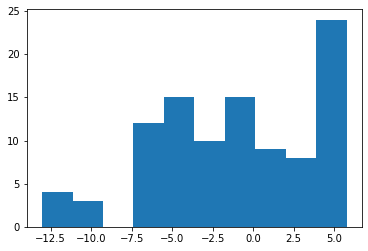

In [4]:
n_sample = 100
student_id = 810198126
sample = my_kappa(n_sample,student_id)
plt.hist(sample)

**B) Calculate and print the mean of the sample you've just drawn.**

In [5]:
m = np.mean(sample)
print("The mean of sample is : ", m)

The mean of sample is :  -1.1013537776773155


**C) Calculate the *unbiased estimation* of the standard deviation of your sample.**

In [37]:
diff = sample-m
N = len(sample)
unbiased_std = np.sqrt(np.sum(np.power(diff, 2)) / N-1)
print("The unbiased_std of sample is : ", unbiased_std)

The unbiased_std of sample is :  4.035069119565258


**D) Answer the following questions.**
- What is an unbiased estimator?
- In what situations the maximum likelihood estimation of the variance of a distribution can severely contaminate the estimation?

~ Type your answer here ...

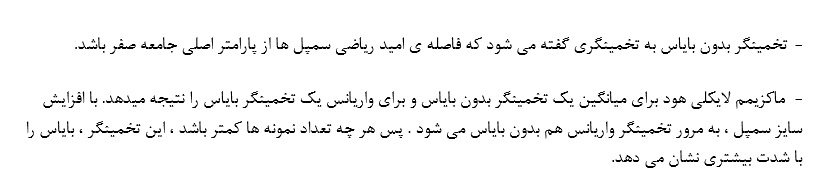

**E) Now, draw 100 samples of size 30 and calculate the mean value for each sample. Draw the histogram of these mean values. Does this histogram resemble any familiar probability distribution function? Why?**

(array([ 5.,  5.,  7., 10., 14., 15., 19., 13.,  8.,  4.]),
 array([-1.73471348, -1.39421107, -1.05370867, -0.71320627, -0.37270386,
        -0.03220146,  0.30830095,  0.64880335,  0.98930576,  1.32980816,
         1.67031057]),
 <a list of 10 Patch objects>)

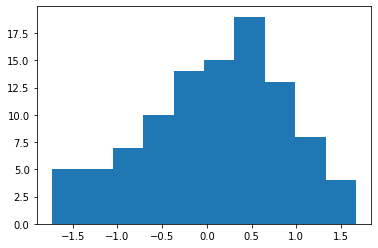

In [7]:
n_sample = 30
means = np.zeros(100)
for i in range(100):
  sample = my_kappa(n_sample,student_id)
  means[i] = np.mean(sample)
plt.hist(means)

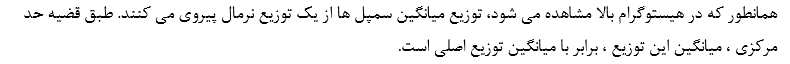

# Problem #2 - Confidence Interval

**A) Load slot_machine.csv dataset using pandas package. This file contains the data recorded from playing a slot machine for 1000 rounds. Each row in the dataset contains the outcome for a reel of the machine as well as the amount of prize won at that round.**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!cp "/content/drive/My Drive/slot_machine.csv" "slot_machine.csv"

In [29]:
import pandas as pd
data = pd.read_csv('slot_machine.csv')
data.head()

,reel1,reel2,reel3,prize
0,Apple,Apple,Apple,28.762213
1,Orange,Apple,Apple,24.541182
2,Apple,Orange,Apple,19.761514
3,Banana,Orange,Apple,9.161757
4,Orange,Apple,Banana,20.491971


**B) Plot the histogram of the prizes won in all rounds.**

(array([ 10.,  18.,  49., 134., 292., 278., 120.,  48.,  37.,  14.]),
 array([ 6.93938796,  9.73392827, 12.52846858, 15.3230089 , 18.11754921,
        20.91208952, 23.70662984, 26.50117015, 29.29571046, 32.09025078,
        34.88479109]),
 <a list of 10 Patch objects>)

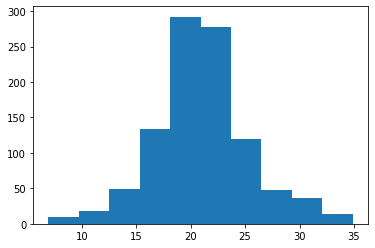

In [30]:
plt.hist(data['prize'])

**C) Assuming that the amount of prize won in each round is a Gaussian random variable with different parameters for each combination of outcomes, construct a 95% confidence interval for the rounds that the outcome is *"Banana, Banana, Apple"*.**

In [38]:
outcome1 = data.loc[(data['reel1'] == 'Banana') & (data['reel2'] == 'Banana') & (data['reel3'] == 'Apple')]
m1 = np.mean(outcome1)
# std1 = np.std(outcome1)
n1 = len(outcome1)
# se1 = std1/np.sqrt(n1)
# lower1 = m1-1.96*se1
# upper1 = m1+1.96*se1

diff1 = outcome1-m1
unbiased_std1 = np.sqrt(np.sum(np.power(diff1, 2)) / (n1-1))
se1 = unbiased_std1/np.sqrt(n1)
lower1 = m1-1.96*se1
upper1 = m1+1.96*se1

print("95% confidence interval for the rounds that the outcome is *Banana, Banana, Apple* = ",(lower1[0],upper1[0]))

95% confidence interval for the rounds that the outcome is *Banana, Banana, Apple* =  (22.091549114264037, 23.875195376821264)


**D) Now, repeat the procedure in part C for *"Orange, Orange, Orange"* and *"Orange, Apple, Banana".***

In [39]:
outcome2 = data.loc[(data['reel1'] == 'Orange') & (data['reel2'] == 'Orange') & (data['reel3'] == 'Orange')]
m2 = np.mean(outcome2)
# std2 = np.std(outcome2)
n2 = len(outcome2)
# se2 = std2/np.sqrt(n2)
# lower2 = m2-1.96*se2
# upper2 = m2+1.96*se2

diff2 = outcome2-m2
unbiased_std2 = np.sqrt(np.sum(np.power(diff2, 2)) / (n2-1))
se2 = unbiased_std2/np.sqrt(n2)
lower2 = m2-1.96*se2
upper2 = m2+1.96*se2

print("95% confidence interval for the rounds that the outcome is *Orange, Orange, Orange* = ",(lower2[0],upper2[0]))

95% confidence interval for the rounds that the outcome is *Orange, Orange, Orange* =  (26.69333552917604, 27.62022689361214)


In [40]:
outcome3 = data.loc[(data['reel1'] == 'Orange') & (data['reel2'] == 'Apple') & (data['reel3'] == 'Banana')]
m3 = np.mean(outcome3)
# std3 = np.std(outcome3)
n3 = len(outcome3)
# se3 = std3/np.sqrt(n3)
# lower3 = m3-1.96*se3
# upper3 = m3+1.96*se3

diff3 = outcome3-m3
unbiased_std3 = np.sqrt(np.sum(np.power(diff3, 2)) / (n3-1))
se3 = unbiased_std3/np.sqrt(n3)
lower3 = m3-1.96*se3
upper3 = m3+1.96*se3
print("95% confidence interval for the rounds that the outcome is *Orange, Apple, Banana* = ",(lower3[0],upper3[0]))

95% confidence interval for the rounds that the outcome is *Orange, Apple, Banana* =  (16.215067626007013, 18.16120992765174)


In [15]:
print(n1,n2,n3)

28 36 47


**D) Answer the following questions.**
- What is a confidenve interval?
- Interpret the results of part C. What does the computed confidence interval mean?
- Is there any noticable difference between the average prize for "Banana, Banana, Apple" and "Oragne, Orange, Orange"? Why?
- Is there any noticable difference between the average prize for "Orange, Orange, Orange" and "Oragne, Apple, Banana"? Why?

~Type your answer here ...

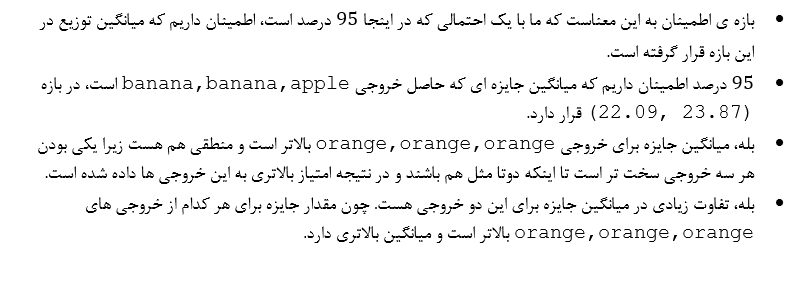

# Problem #3 - Estimating The Parameters of Some Observations

**In this problem, you're going to estimate the average value of a random variable. In contrast with previous problems, you are going to estimate that value over time. To observe a single realization of this random variable, call `my_normal(student_id)` function. Upon calling this function, a single observation/realization of this random variable is returned.**

**A) Draw 100 samples from my_omicron distribution. After observing each realization, calculate the sample mean of the realizations you've observed so far. In addition to that, construct a confidence interval for your estimation at 0.1 significane level. Finally, plot your estimations in a bar plot alongside their confidence errors as whisckers of each bar. Your final plot should be similar to this:**

<img src="https://support.content.office.net/en-us/media/68efe29e-f30c-4c6f-95cf-9cff7dde1131.jpg" width="400px" alt="no internet connection!">

In [16]:
def my_normal(student_id):
    digits = np.array([int(d) for d in str(student_id)])
    return np.random.normal(loc=np.sum(digits), scale=(digits[3] + digits[5]+1)/(digits[3]+1))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


confidence interval=( nan nan ) in  0 iteration
confidence interval=( 22.7546725894641 49.838604965855616 ) in  1 iteration
confidence interval=( 28.029176765113103 43.72633650928909 ) in  2 iteration
confidence interval=( 31.064243087762584 42.59419444815489 ) in  3 iteration
confidence interval=( 31.242300513935472 40.637597919723184 ) in  4 iteration
confidence interval=( 32.35864356568911 40.08547799535884 ) in  5 iteration
confidence interval=( 31.953723229698937 38.95358107851351 ) in  6 iteration
confidence interval=( 32.69450153427669 38.84442001999923 ) in  7 iteration
confidence interval=( 33.54573158861459 39.518580804719896 ) in  8 iteration
confidence interval=( 33.09690840771567 38.781946747548965 ) in  9 iteration
confidence interval=( 33.19099807830937 38.36114745932458 ) in  10 iteration
confidence interval=( 33.596338117844205 38.36303490342619 ) in  11 iteration
confidence interval=( 33.72736110968522 38.11619635115183 ) in  12 iteration
confidence interval=( 33.4406

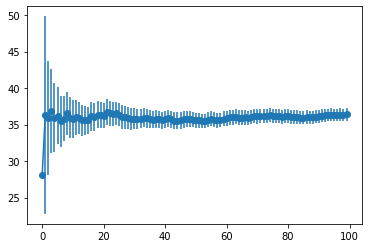

In [17]:
sample2 = []
error = []
y = []
for i in range(100):
  sample2.append(my_normal(student_id))
  mean_sample2 = np.mean(sample2)
  diff = sample2 - mean_sample2
  sigma = np.sqrt(np.sum(np.power(diff, 2)) / (len(sample2)-1))
  lower = mean_sample2-1.64*sigma/np.sqrt(len(sample2))
  upper = mean_sample2+1.64*sigma/np.sqrt(len(sample2))
  print('confidence interval=(',lower,upper,') in ',i,'iteration')
  error.append(1.64*sigma/np.sqrt(len(sample2)))
  y.append(mean_sample2)

x = np.arange(0,100)
plt.errorbar(x, y, yerr=error, fmt='o-')
#plt.errorbar(x, y, yerr=e, fmt='o-',xlolims=True ,ecolor='red' )
plt.show()

**B) How is your estimation changing over time? How is your confidence interval changing? Explain why.**

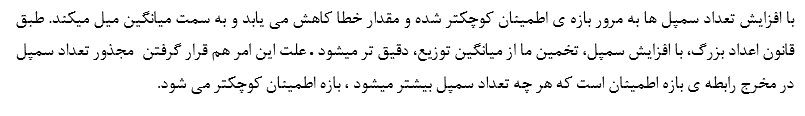